# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
df = pd.read_csv('height-weight.csv')
df.head(10)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


# Visulalize the data

Text(0, 0.5, 'Height')

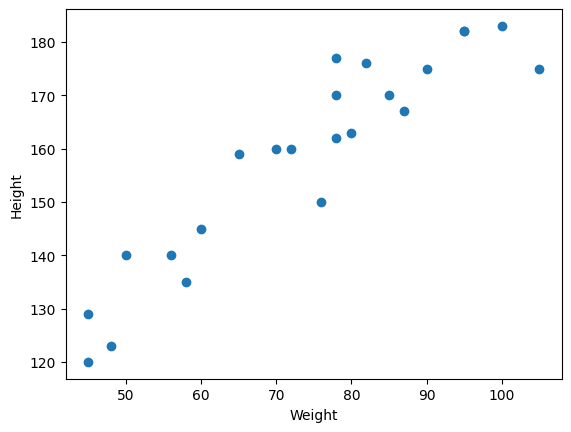

In [3]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

### In here we can see as the weight increases the height also incrase so there is a linear relationship

********

In [4]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


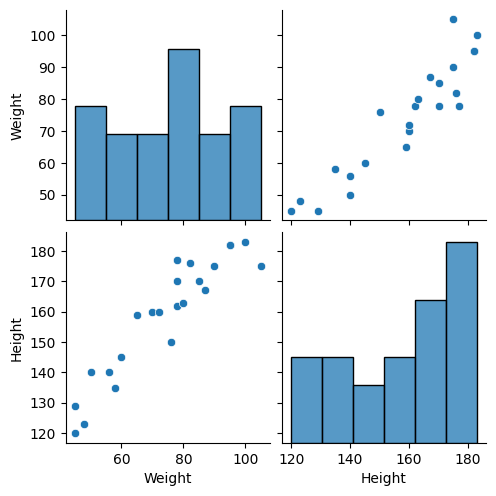

In [5]:
sns.pairplot(df)

# Divide features into independent and dependent features

In [6]:
df.head(2)

,Weight,Height
0,45,120
1,58,135


In [7]:
X = df.drop('Height', axis=1)
X[:5]

,Weight
0,45
1,58
2,48
3,60
4,70


In [8]:
y = df['Height']
y[:5]

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

### Always our independent feauture should be in a dataFrame or 2 dimentional array
### In dependent feature we dont have to make it 2D or a DataFrame we can keep it as a series or 1D

***********

# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1011)

In [11]:
len(X_train), len(X_test), len(y_train), len(y_test)

(17, 6, 17, 6)

# Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [15]:
scaled_X_train[:5]

array([[ 1.71548548],
       [ 0.04076401],
       [-1.57620844],
       [ 0.15626204],
       [-1.46071041]])

In [16]:
scaled_X_test[:5]

array([[-0.88322025],
       [ 1.13799532],
       [ 0.38725811],
       [-1.74945549],
       [ 0.27176008]])

# Create the model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regressor = LinearRegression()

In [19]:
regressor.fit(scaled_X_train, y_train)

LinearRegression()

In [20]:
regressor.coef_

array([16.35955696])

### This coef is the slope .. we get only one slope value, because we only have 1 independent feature

### One unit movement in X axis will lead to 16.3595 unit movement in y axis

In [21]:
regressor.intercept_

159.8235294117647

*********

# Plot training data and best fit line

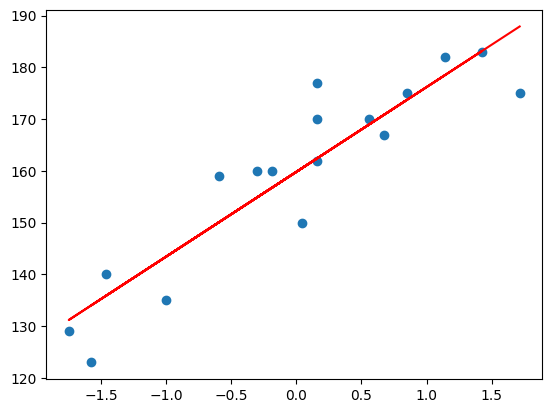

In [22]:
plt.scatter(scaled_X_train, y_train)
plt.plot(scaled_X_train, regressor.predict(scaled_X_train), c='r')

# Prediction  for the test data

In [23]:
y_pred = regressor.predict(scaled_X_test)
y_pred

array([145.37443744, 178.44062868, 166.15890051, 131.20321263,
       164.26940386, 141.59544416])

# Check the performance using performance metrices

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2_score = r2_score(y_test, y_pred)
Adjusted_R2 = 1-(1-R2_score)*(len(y_test)-1)/(len(y_test)-scaled_X_test.shape[1]-1)

In [26]:
errors = pd.DataFrame({"MAE":MAE, "MSE":MSE, "RMSE":RMSE, "R2":R2_score, "Adjusted_R2":Adjusted_R2}, index=['errors'])
errors

,MAE,MSE,RMSE,R2,Adjusted_R2
errors,4.640495,39.887561,6.31566,0.913953,0.892441


# Prediction for new data

In [27]:
regressor.predict([[72]])

array([1337.71163056])

### Here we get a very absurd value.. for a person with 72kg weight we get an height of 1337.. we get this because we missed a very important step which is the standardization. we should always standardize the data before we predict

In [28]:
regressor.predict(scaler.transform([[72]]))

C:\Users\user\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([156.7114173])

### Now we get the correct answer

************

# Using OLS linear Regression

In [29]:
!pip install statsmodels

In [30]:
import statsmodels.api as sm

In [31]:
model = sm.OLS(y_train, scaled_X_train).fit()

In [32]:
y_pred_ols = model.predict(X_test)
y_pred_ols

3      981.573418
8     1554.157911
10    1341.483671
0      736.180063
6     1308.764557
21     916.135190
dtype: float64

In [33]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.010
Model:                            OLS   Adj. R-squared (uncentered):             -0.052
Method:                 Least Squares   F-statistic:                             0.1673
Date:                Wed, 23 Oct 2024   Prob (F-statistic):                       0.688
Time:                        13:28:32   Log-Likelihood:                         -110.40
No. Observations:                  17   AIC:                                      222.8
Df Residuals:                      16   BIC:                                      223.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\user\anaconda3\envs\mlenv\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)
